> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::

# El arte de medir II




$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathcal H}} $
$ \newcommand{\boldn}{{\bf n}} $
$ \newcommand{\tr}{{\rm tr}}$



In [49]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

## Medidas de estados multicúbit

Un aparato de medida estándar  hace colapsar el estado a un elemento $\ket{x}$ de la *base computacional*, que identificamos mediante una cadena de bits $a_{n-1}...a_0$ con $a_i=0,1$,  donde $x= 2^{n-1}i_{n-1}+...+2^0 a_0$.


::::{figure} images/Multimeter_zbasis.png
:width: 400px
:align: center

::::

Este medidor está asociado al operador hermítico $\sigma_z^{\otimes n} = Z\otimes \ldots \otimes Z$

### Circuitos con múltiples cúbits y medidas en Qiskit

Un estado general en un circuito de $n$ cúbits se expresará en la base computacional

$$
\ket{\psi} = \sum_{i_{n-1},...,i_0= 0,1} c_{i_{n-1}...i_0} \ket{i_{n-1}...i_0} = \sum_a c_a \ket{a}
$$

Las medida es esencialmente un mapa entre n-cúbits cuánticos y n-bits clásicos.

$$
\ket{i_{n-1} i_{n-2}\, ... \, i_0} ~~\longrightarrow ~~ i_{n-1}i_{n-2}...i_0\in \{0,1\}^n
$$

La manera de tener acceso al valor absoluto de las amplitudes es midiendo repetidas veces para reconstruir la función de probabilidad

$$
|c_{i_{n-1} i_{n-2}...i_0}|^2 =p(i_{n-1} i_{n-2}...i_0)= \frac{n_{i_{n-1} i_{n-2}...i_0}}{N}
$$

donde $N$ es el número total de medidas.

<IPython.core.display.Latex object>

/opt/anaconda3/envs/nbclassic/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


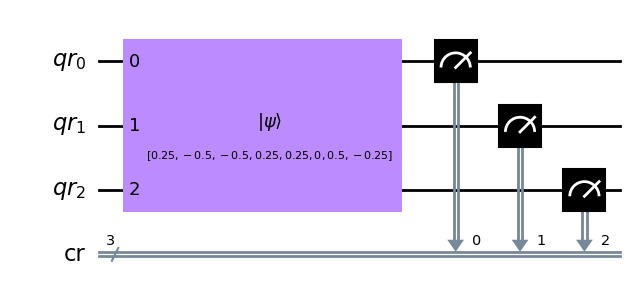

Cuentas= {'100': 6327, '110': 25129, '001': 24963, '111': 6255, '011': 6180, '000': 6211, '010': 24935}


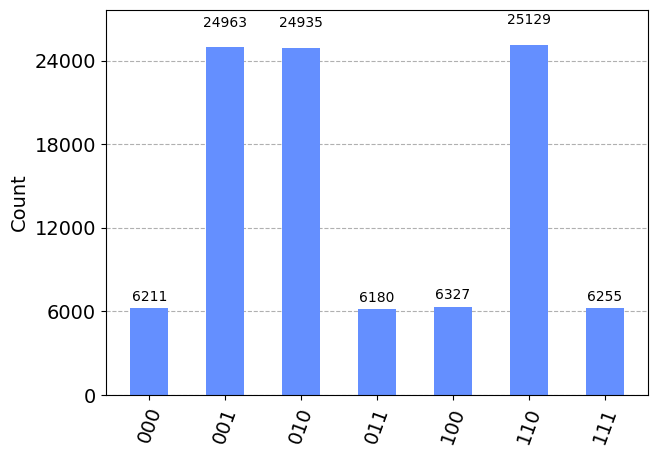

Probabilidades= {'100': 0.06327, '110': 0.25129, '001': 0.24963, '111': 0.06255, '011': 0.0618, '000': 0.06211, '010': 0.24935}


In [59]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy.linalg as la
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator 

'definimos un estado de entrada en H^3$'
psi =[1.,-2, -2,1,1,0,2,-1]
psi/=la.norm(psi)
display(Statevector(psi).draw('Latex'))

qr = QuantumRegister(3,name='qr')
cr = ClassicalRegister(3,name='cr')
qc_psi_Qs = QuantumCircuit(qr,cr)
qc_psi_Qs.initialize(psi,qr)
qc_psi_Qs.measure(qr[:],cr[:])
display(qc_psi_Qs.draw(output='mpl'))

'ejecutamos el circuito y graficamos la estadística de cuentas'
nshots = 100000

job=AerSimulator().run(qc_psi_Qs,shots=nshots) 
result=job.result()
counts = result.get_counts()        
print('Cuentas=',counts)        #diccionario de cuentas
display(plot_histogram(counts)) # Mostramos un histograma de resultados

'transformamos las cuentas en un diccionario de  probabilidades '    
probs_psi=counts.copy()         # vamos a modificar el diccionario "cuentas" con las probabilidades 
for bitstring,counts in probs_psi.items():
    probs_psi[bitstring]= counts/nshots

print('Probabilidades=', probs_psi)

## Medidas en bases generales

Al igual que en el capítulo anterior, desearíamos poder medir el estado en una base ortonormal arbitraria $\{\ket{ x}'\}$, $x=0,...,2^n-1$. 

Esto quiere decir que buscamos un circuito que, a la llegada de un vector  concreto de la base $\ket{x}'=\ket{a_{n-1}...a_0}'$, devuelva exactamente *la  colección* de bits:  $~a_{n-1}...a_0$ donde $a_i = 0,1$

$$
M : \ket{a_{n-1}...a_0}' ~~~~~~\Longrightarrow ~~~~~~ a_{n-1}...a_0
$$

Vamos a suponer que conocemos el operador unitario, $U$, que lleva la  base computacional a la base deseada 

$$\ket{a_{n-1}...a_0}'= U\ket{a_{n-1}...a_0}~~~~~~\Longleftrightarrow ~~~~~~   U^\dagger\ket{a_{n-1}...a_0}' = \ket{ a_{n-1}...a_0}  \, .$$

Entonces es evidente que sólo tenemos que añadir el operador $U^\dagger$ antes de usar el medidor estándar 




::::{figure} images/Multimeter_basis.png
:width: 450px
:align: center

::::



### Medidas  de Pauli

En caso más frecuente consiste en medir diferentes cúbits en diferentes bases de Pauli, $X$, $Y$ ó $Z$.
En este caso, $U$ es un producto de *rotaciones locales* en cada cúbit, $\ket{a_i}_x = H\ket{a_i}_z$ ó $\ket{a_i}_y = SH\ket{a_i}$.
Por ejemplo el siguiente circuito mide en la base $Z_0X_1Y_2$




::::{figure} images/XYZ_multimeter.png
:width: 250px
:align: center

::::



definamos una función que añade aparatos de medida en bases $X$, $Y$ ó $Z$ a partir de una *cadena* como 'xxy' etc. 

/opt/anaconda3/envs/nbclassic/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


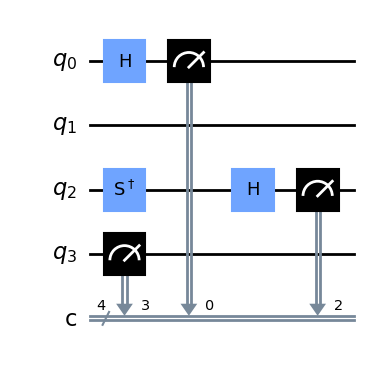

In [52]:
def add_multimeasure_XYZ(qc,paulistring):

    assert(qc.num_qubits==len(paulistring)) #check whether width of circuit coincides with length of Pauli string

    for i,basis in enumerate(reversed(paulistring)):
        if  basis == 'X':
            qc.h(i)    
            qc.measure(i, i)
        elif basis == 'Z':
            qc.measure(i, i)
            pass    
        elif basis == 'Y':
            qc.sdg(i)
            qc.h(i)
            qc.measure(i, i)

    return qc 

'Veamos un ejemplo'
from qiskit import QuantumCircuit
qc = QuantumCircuit(4,4)
add_multimeasure_XYZ(qc,'ZYIX')  # probar a cambiar el aparato de medida
qc.draw('mpl')

### Medida de Bell

El circuito 

::::{figure} images/Bell_basis.png
:width: 200px
:align: center

::::



 genera la <i>base de Bell</i> $\ket{B_{xy}} = \ket{xy}_B $ a partir de la <i>base computacional</i> $\{\ket{xy}\}$ 

$$
\begin{array}{rcl}
\ket{00}_B &=& \frac{1}{\sqrt{2}} \big( \ket{00} + \ket{11} \big) \\
\ket{01}_B &=& \frac{1}{\sqrt{2}} \big( \ket{01} + \ket{10} \big) \\
\ket{10}_B &=& \frac{1}{\sqrt{2}} \big( \ket{00} - \ket{11} \big) \\
\ket{11}_B &=& \frac{1}{\sqrt{2}} \big( \ket{01} - \ket{10} \big) \\
\end{array}
$$

El circuito que efectúa una medida en la base de Bell será, por tanto

$$
\ket{xy}_B \to xy
$$
utiliza el *desentrelazador* 

$$U^\dagger = ( \hbox{CNOT}\cdot H)^\dagger = H\cdot \hbox{CNOT}$$ 

antes del medidor 




::::{figure} images/Bell_meter.png
:width: 400px
:align: center

::::


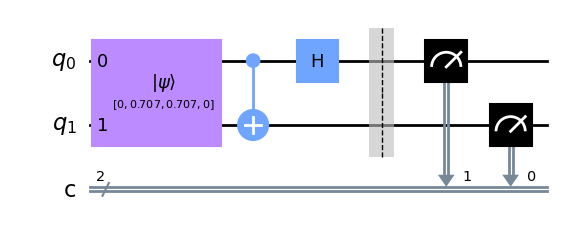

/var/folders/jv/lqf3ggs56dz0wc8dtkz265440000gn/T/ipykernel_94565/1043122292.py:19: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  execute(qc,backend=M_simulator).result().get_counts()


{'01': 1024}

In [9]:
def add_Bell_measurement(qc,qubits=[0,1]):
    qc.cx(qubits[0],qubits[1])
    qc.h(0)
    qc.barrier()
    qc.measure([0,1],[1,0])
    
'ahora verificamos'
from qiskit import QuantumCircuit

'creamos el circuito'
qc = QuantumCircuit(2,2)

'definimos la base de Bell'
B00 = np.array([1,0,0,1]/np.sqrt(2))
B01 = np.array([1,0,0,-1]/np.sqrt(2))
B10 = np.array([0,1,1,0]/np.sqrt(2))
B11 = np.array([0,1,-1,0]/np.sqrt(2))

'inicializamos el estado de entrada en cualquiera de los estados anteriores'
qc.initialize(B10,[0,1])

'añadimos el medidor en la base de Bell
add_Bell_measurement(qc,[0,1])
display(qc.draw('mpl'))

execute(qc,backend=M_simulator).result().get_counts()

## Valores esperados de observables multi-cúbit

El *problema* esencial para medir un valor esperado $\bra{\psi} A \ket{\psi}$ es que, en general,  $A$ **no es un operador unitario**. Por tanto no se puede incluir como parte de un circuito

Si pudiésemos expresar  como una combinación de operadores unitarios, $A = \sum_i c_i U_i$, entonces sí podríamos calcular cada valor esperado $\langle U_i\rangle$ mediante un circuito y, finalmente, componer el resultado $\langle A\rangle = \sum_i c_i \langle U_i\rangle$

Una base  la constituyen la *base de cadenas de Pauli*,  $U = \sigma_{i_1}\otimes \ldots \otimes \sigma_{i_n}$ que son, a la vez, hermíticas y unitarias

$$
A = \sum_{i_1,...,i_n=0}^3 a_{i_1\ldots i_n} \, \sigma_{i_1}\otimes \ldots \otimes \sigma_{i_n}
$$

donde $\sigma_i = (I,X,Y,Z)$. Por ejemplo, con $n=3$ 

$$
\sigma_2\otimes \sigma_0 \otimes \sigma_3 =  Y\otimes I\otimes Z 
$$

los coeficientes se pueden obtener calculando las trazas

$$
a_{i_1\ldots i_n} =\frac{1}{2^n} \tr (A \,  \sigma_{i_1}\otimes \ldots  \otimes\sigma_{i_n})
$$


Por tanto sólo tenemos que averiguar los valores esperados de cadenas de Pauli

$$
\langle A \rangle_{\psi} =  \sum_{i_1,...,i_n=0}^3 a_{i_1\ldots i_n} \langle \sigma_{i_1}\otimes \ldots   \otimes\sigma_{i_n}\rangle
$$

In [95]:
' Matrices de Pauli'
s0 = np.array([[1,0],[0,1]]) # matriz identidad
s1 = np.array([[0,1],[1,0]])
s2 = np.array([[0,-1j],[1j,0]])
s3 = np.array([[1,0],[0,-1]])

Pauli_basis = [s0,s1,s2,s3]

' Cadena de Pauli YIZ = s2s0s3' 
Pauli_string_203 = np.kron(s2,np.kron(s0,s3))
display(array_to_latex(Pauli_string_203,prefix='YIZ ='))

'Matriz arbitraria'
A = np.random.rand(8,8) + 1j* np.random.rand(8,8)

'Proyección a_203 de A sobre YIZ'
a_203 = np.trace(np.dot(A,Pauli_string_203))/2**3

print('a_203 = ', a_203)

<IPython.core.display.Latex object>

a_203 =  (-0.022249437380891343-0.025989132108195978j)


### Valores esperados de cadenas de Pauli

Veamos cómo calcular el valor esperado siguiente

$$
\langle Z\otimes Z\otimes Z\rangle_\Psi  = \bra{\Psi}   Z\otimes Z\otimes Z \ket{\Psi}
$$

Dado que $Z\ket{i} = (-1)^i\ket{i}$ donde $i=0,1$, insertando la identidad, el valor esperado  de este operador es

$$
\begin{array}{rcl}
\langle  Z\otimes Z\otimes Z\rangle_\Psi &=&
\bra{\Psi} Z\otimes Z\otimes Z \ket{\Psi} \\ 
&=& \sum_{i_2,i_1,i_0=0,1}\bra{\Psi} Z\otimes Z\otimes Z \ket{i_2 i_1 i_0}\braket{i_2 i_1 i_0}{\Psi}  \rule{0mm}{10mm}  \\ \rule{0mm}{10mm}
&=& \sum_{i_2,i_1,i_0=0,1}(-1)^{i_2 + i_1 + i_0}\big|\bra{i_2 i_1 i_0}\Psi\rangle\big|^2 \\ \rule{0mm}{10mm}
&=& \sum_{i_2,i_1,i_0=0,1} (-1)^{i_2 + i_1 + i_0} p(i_2,i_1,i_0) \nonumber\\ 
\end{array}
$$

Naturalmente, $\langle ZZZ\rangle $ es el valor medio  de la distribución de probabilidad  $\{\lambda(x),p(x)\},$ con $x=(i_2 i_1 i_0)$ 

$$
 \langle ZZZ\rangle = \bar \lambda = \sum_x \lambda(x) p(x) = \sum_{x}(-1)^{i_{2}+i_1+i_0}\frac{n(x)}{\sum_x n(x)} 
$$

También podemos obtener la varianza de esta distribución

$$
\sigma^2 = \sum_{x}\left((-1)^{i_{2}+i_1+i_0}-\bar\lambda \right)^2 p(x)
$$

In [96]:
'aprovechamos el diccionatio "probs_psi" creado al principio de este capítulo'

mean = 0
for bitstring,probs  in probs_psi.items():
    mean += (-1)**(sum([int(bit) for bit in bitstring])) * probs 

print('<ZZZ>_shots =', np.round(mean,5) )

'verificamos con la expresión analítica'
Z = np.array([[1,0],[0,-1]])
ZZZ = np.kron(s3,np.kron(s3,s3))
print('<ZZZ>_analitico =', tQ.braket(psi,np.dot(ZZZ,psi)) )

variance=0
for bitstring,probs  in probs_psi.items():
    variance += ((-1)**(sum([int(bit) for bit in bitstring]))-mean)**2 * probs
    
print('sigma = ', np.sqrt(variance) )

<ZZZ>_shots = -0.2496
<ZZZ>_analitico = -0.25
sigma =  0.9683490279852612


Ahora es muy evidente cómo medir el valor esperado de otras *cadenas de Pauli* en el mismo estado. Por ejemplo

$$
\langle Z\otimes X\otimes Y\rangle_\Psi  = \bra{\Psi}   Z\otimes X\otimes Y \ket{\Psi}
$$





In [98]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)


' ahora generamos el circuito que mide en la base ZXY'
qc.initialize(psi, qr)
add_multimeasure_XYZ(qc,'ZXY')
qc.draw(output='mpl')

counts = AerSimulator().run(qc,shots=nshots).result().get_counts()
print(counts)

mean = 0
for bitstring,count  in counts.items():
    mean += (-1)**(sum([int(bit) for bit in bitstring])) * count/nshots 

print('<ZXY> =', np.round(mean,5) )

'verificamos con la expresión analítica'
ZXY = np.kron(s3,np.kron(s2,s1))
print('<ZXY>_analitico =', tQ.braket(psi,np.dot(ZXY,psi)) )


{'110': 3147, '100': 15278, '001': 3204, '111': 3072, '011': 28284, '000': 3196, '010': 28183, '101': 15636}
<ZXY> = 0.00526
<ZXY>_analitico = 0j


::::::{admonition} Ejercicio
:class: tip

    
Considera el hamiltoniano $H=\lambda (X X+Y Y+Z Z)$ siendo $\lambda =1.47\cdot 10^{-6}eV$. 
 Calcular el valor esperado de la energía $E = \langle H\rangle_\Psi$  en los cuatro estados de Bell
$\ket{\Psi} = \ket{ij}_B$. 
::::::


### Medida de Hadamard

Al final, el valor esperado de un operador es un simple número que se obtiene a partir de una distribución aleatoria de valores. 
¿No podríamos diseñar una variable aleatoria cuyo valor medio coincida con ese resultado? 
La medida de Hadamard hace precisamente esto aprovechando el entrelazamiento. 

Consideremos el siguiente circuito


::::{figure} images/Hadamard_measure.png
:width: 280px
:align: center

::::


El aparato de medida sólo registra valores $\{0,1\}$ como resultado de las medidas proyectivas sobre los ejes $X$  ó $Y$. Supongamos que medimos con el observable $X$. El promedio 

$$
p_{0}-p_{1} = \frac{n_{0}}{N} - \frac{n_{1}}{N} = \langle X\rangle_{ancilla}
$$

es el valor esperado de $X$ en la ancilla. Análogamente, será $\langle Y\rangle_{ancilla}$  si usamos el observable $Y$.  Vamos a demostrar el siguiente resultado que relaciona estos dos números con el valor esperado de $U$ en el estado $\ket{\psi}$



::::::{card} 
<b>Teorema</b>:  

^^^

$$
\langle X\rangle_{ancilla} = {\rm Re} \langle U\rangle_{\psi} ~~~,~~~ \langle Y\rangle_{ancilla} = {\rm Im} \langle U\rangle_{\psi}\, 
$$
::::::

La demostración requiere un cálculo explícito. Para el caso de medir con $X$, el circuito anterior será



::::{figure} images/Hadamard_measurea.png
:width: 350px
:align: center

::::




Un cálculo explícito nos da el estado que llega al aparato de medida


$$
\ket{0}\ket{\psi} ~\to ~ \ket{\Psi} = \frac{1}{2} \left[\rule{0mm}{3mm} |0\rangle \otimes (1 + U) |\psi\rangle +  |1\rangle \otimes (1 - U) |\psi\rangle \right] \label{hadam}
$$

El número $ p_{0} - p_{1}$ es el valor esperado de $\langle X\rangle $ en el estado de la ancilla justo  antes de la barrera. Encontramos el siguiente resultado 

$$
\langle{X}\rangle_{ancilla}  =  \hbox{Re}\bra{\psi} U \ket{\psi}
$$

Supongamos ahora que medimos en la base $Y$, es decir, con el circuito siguiente.



::::{figure} images/Hadamard_measureb.png
:width: 350px
:align: center

::::


::::::{admonition} Ejercicio
:class: tip

    
    
Verificar que la parte imaginaria viene de medir  $\langle Y\rangle$ en la ancilla

$$
\langle{Y}\rangle_{ancilla}  =  \hbox{Im}\bra{\psi} U \ket{\psi} \, .
$$
::::::


::::::{admonition} Ejercicio
:class: tip

    
Obtener el valor esperado de $\langle Z\otimes Z\otimes Z\rangle_\Psi$ en el estado 

$$
|\psi> = \frac{i}{4}|000>+\frac{1}{\sqrt{8}}|001>+\frac{1+i}{4}|010>+\frac{1+2i}{\sqrt{8}}|101>+\frac{1}{4}|110>
$$

usando el método de Hadamard.
::::::


Generamos el circuito de medida de Hadamard

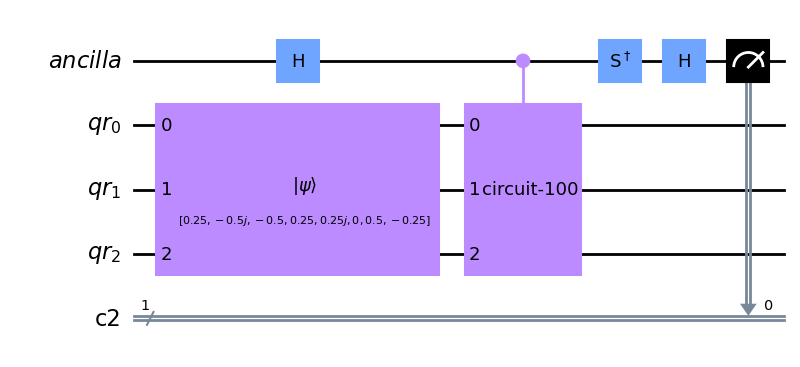

In [22]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister

qr = QuantumRegister(3, name = 'qr')
qra = QuantumRegister(1, name = 'ancilla')
cr = ClassicalRegister(1)

'creamos el operador como una puerta "gate" que admite el método "control'
qc0 = QuantumCircuit(qr)
qc0.z(qr)
CZZZ_gate = qc0.to_gate().control(1,ctrl_state= 1) 

'creamos el circuito con el operador controlado'
qc_Had = QuantumCircuit(qra,qr,cr)
qc_Had.initialize(psi,qr)
qc_Had.h(qra)  
qc_Had.append(CZZZ_gate,qra[:] + qr[:])
qc_Had.sdg(qra)
qc_Had.h(qra)
qc_Had.measure(qra,cr)

qc_Had.draw('mpl')

Ejecutamos y obtenemos el valor esperado

{'0': 499847, '1': 500153}


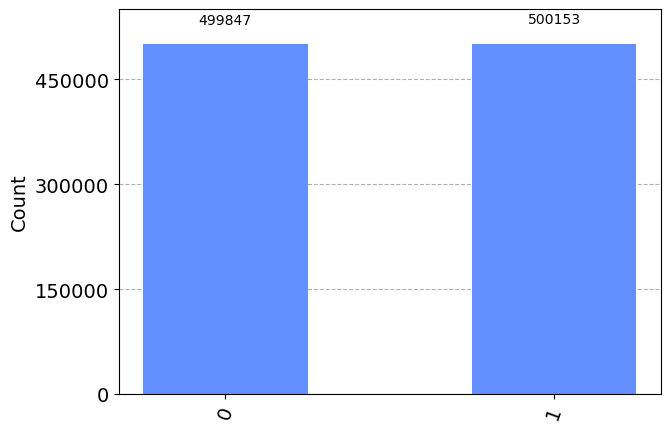

In [23]:
M_backend = Aer.get_backend('qasm_simulator')
shots=1000000

cuentas_Had= execute(qc_Had,M_backend,shots=shots).result().get_counts()
print(cuentas_Had)

from qiskit.tools.visualization import plot_histogram
plot_histogram(cuentas_Had)

::::::{admonition} Ejercicio
:class: tip

    
Define una función <i>add_Hadamadard_measure</i> que reciba un circuito y una  cadena de Pauli y añada al circuito el medidor de Hadamard asociado.
::::::


#### Proyección de Hadamard

Supongamos el operador $U$ es un operador sobre 1 cúbit *a la vez hermítico y unitario*.

Por tanto puede ser considerado, a la vez,

- un observable con autovalores reales  $\lambda = \pm1$ y 

- una puerta cuántica con autovalores de módulo unidad

Ello deja a $\lambda = \pm 1$ como los únicos autovalores posibles para un operador así. 
Los operadores $X,Y,Z$ y $H$ son ejemplos de ello. 





Denominemos $\ket{a}_U, \, a=0,1$  los autovectores de $U$ con autovalores $(-1)^a$, es decir $U\ket{a}_U = (-1)^a\ket{a}_U$. 

En este caso, los factores $(1\pm U)$ que aparecen en la medida de Hadamard son proyectores ortogonales sobre los autoestados de $U$




::::{figure} images/HadamardProjection.png
:width: 280px
:align: center

::::



La imagen bajo este circuito de un estado de entrada $\ket{0}\ket{\psi}$ ahora será



$$
\ket{0}\ket{\psi} = \ket{0}\otimes (\alpha\ket{0}_U + \beta\ket{1}_U) ~~\longrightarrow ~~  \alpha\ket{0}\ket{0}_U +  \beta\ket{1}\ket{1}_U\, .
$$


Al igual que con los estados de Bell, cada resultado de  medida en la ancilla está correlacionado con un autoestado del operador $U$. 




